# PHYS 576 HW 1
### Joshua LaBounty
### 10/2/2018

This notebook will be used to complete the assignment detailed here: https://canvas.uw.edu/courses/1224622/files?preview=50937030 and here ./pdf/hw1.pdf

In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

%matplotlib inline

Welcome to JupyROOT 6.12/06


You can work through this problem set however you like. Jupyter notebooks, matlab, analytic calculations, etc. But please document your thinking clearly in words and plots, as well as coming up with an answer. For the first few problems we’re going to play with a Poisson distribution. Tools for throwing random poisson distributions and calculating cumulative probability functions can be found in scipy.stats or matlab’s Statistics and Machine Learning Toolbox.

So let’s imagine that we have an experiment that counts events, and the average number of events is well determined to be 50.1. You can imagine this as something that counts radiative decays, with a background decay rate of 50.1 in your measurement interval. Or it could be counting cosmic rays coming from a particular direction on the sky.

1) Simulate what this distribution will look like, and plot on a semilogy histogram plot. 1e4 or 1e5 points should be fine. This is a set of realizations of the background.

In [2]:
#Lets generate a random Poisson distribution with a mean of 50.1, and N = 1e5
nPoints = 10**5
mean = 50.1

testPoisson = scipy.stats.poisson.rvs(mean, size=nPoints)

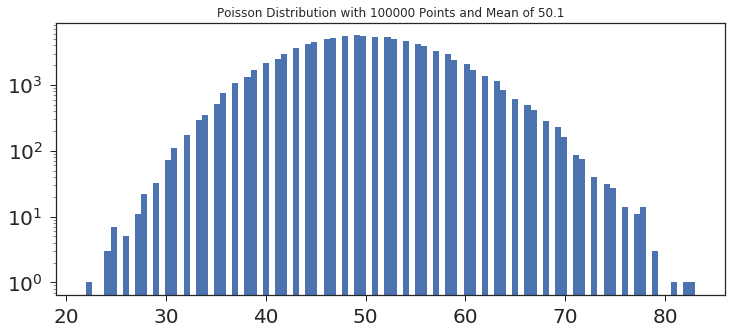

In [3]:
#Now lets plot this and make sure it has been generated correctly
fig, ax = plt.subplots(figsize=(12, 5))
plt.hist(testPoisson,log=True,bins=100)
plt.title("Poisson Distribution with "+str(nPoints)+" Points and Mean of "+str(mean))
plt.show()

In [4]:
#Now lets also turn this into a root histogram for easy fitting
h1 = r.TH1D("h1","Poisson Distribution with "+str(nPoints)+" Points and Mean of "+str(mean)+";Measured Decay Rate;N",1000,0,100)
for ding in testPoisson:
    h1.Fill(ding)

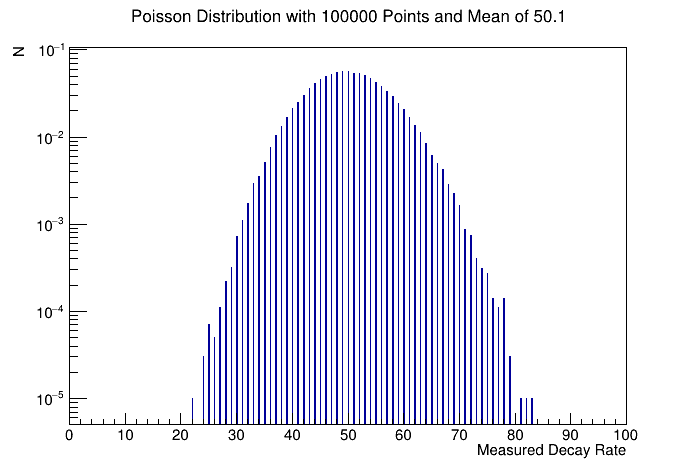

In [5]:
c1 = r.TCanvas()
c1.SetLogy()
h1.Draw("HIST")

#Normalize the histogram so that the PDF works as advertized
h1.Scale(1/(h1.GetEntries()))

c1.Draw()

2) Turn your measurements of the background into a measured probability distribution. The
result should integrate to 1.

Reduced ChiSq: 0.9887958369859436
Prob: 0.49942405921993127
 FCN=57.3502 FROM MIGRAD    STATUS=CONVERGED      37 CALLS          38 TOTAL
                     EDM=2.65614e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Normalization   9.99469e-01   3.16151e-03   1.17919e-05  -6.51719e-04
   2  Mean         5.01500e+01   2.25719e-02   8.41898e-05   1.01703e-03
 FCN=57.3502 FROM MIGRAD    STATUS=CONVERGED      25 CALLS          26 TOTAL
                     EDM=7.43894e-18    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Normalization   9.99469e-01   3.16151e-03   1.17919e-05   6.89939e-07
   2  Mean         5.01500e+01   2.25719e-02   8.41897e-05  -1.40944e-07


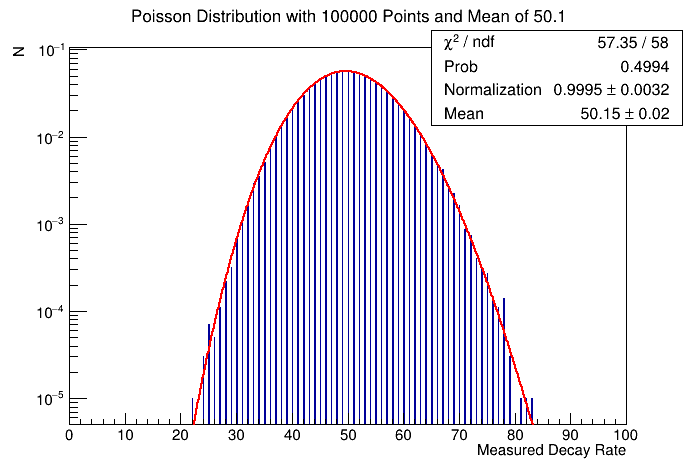

In [6]:
#Now lets put that TH1 to good use and fit this data with a poisson distribution 
#We're cheating a bit here by 'knowing' that we should use a Poisson distribution, 
    #and not comparing the results with other PDF's

def peak_fit(x, p):
    return p[0]*r.TMath.Poisson(x[0],p[1])

func1 = r.TF1("poisson", peak_fit, 0,100,2)
func1.SetParNames('Normalization','Mean')
func1.SetParameters(1,50)
func1.SetLineColor(2)
func1.SetNpx(1000)

for i in range(2): #run fit twice to first get better initial guess, then get actual fit
    h1.Fit("poisson")
func1.Draw("SAME")
c1.Update()
c1.Draw()

chiSq = ( ( func1.GetNDF(),
              func1.GetChisquare(),
              func1.GetProb() ) )

print("Reduced ChiSq:",chiSq[1] / chiSq[0])
print("Prob:", chiSq[2])

In [7]:
#check that this integrates to 1
func1.Integral(-10,100000)

0.9994694451739387

In [8]:
#Looks good enough for me.

3) Now imagine that you are looking for a source (something that will add signal counts to your
background), and you measure 80 events. What is the probability of your detection? [Hint: your
simulation does not have enough realizations, so an analytic calculation is needed.